<a href="https://colab.research.google.com/github/eve-4t/tea/blob/main/CardioGood_Fitness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Setup the dataframe and import any features needed here**

Click on the + Code to add your own section of code and please make sure that you use a copy of df.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
file_path = '/content/AdRight/CardioGoodFitness.csv'
df = pd.read_csv(file_path)

Show all the unique values for Education

In [9]:
# Extract unique education levels
unique_education_levels = df['Education'].unique()

# Print the unique education levels
print("Unique Education Levels:")
for edu_level in unique_education_levels:
    print(edu_level)

Unique Education Levels:
14
15
12
13
16
18
20
21


A function to map Education to a value that has meaning

In [10]:
# Function to map Education values to their respective aliases
def map_education_aliases(df):
    """
    This function maps Education values to their respective aliases.

    Parameters:
    df (pandas.DataFrame): The input DataFrame containing the data.

    Returns:
    pandas.DataFrame: The modified DataFrame with Education aliases.
    """
    education_mapping = {12: 'GCSE', 13: 'GCSE', 14: 'A Level', 15: 'A Level',
                         16: 'Degree', 18: 'Degree', 20: 'PhD', 21: 'PhD'}
    df['EducationAlias'] = df['Education'].map(education_mapping)
    return df


Use the map_education_aliases funtion to map a bar chart

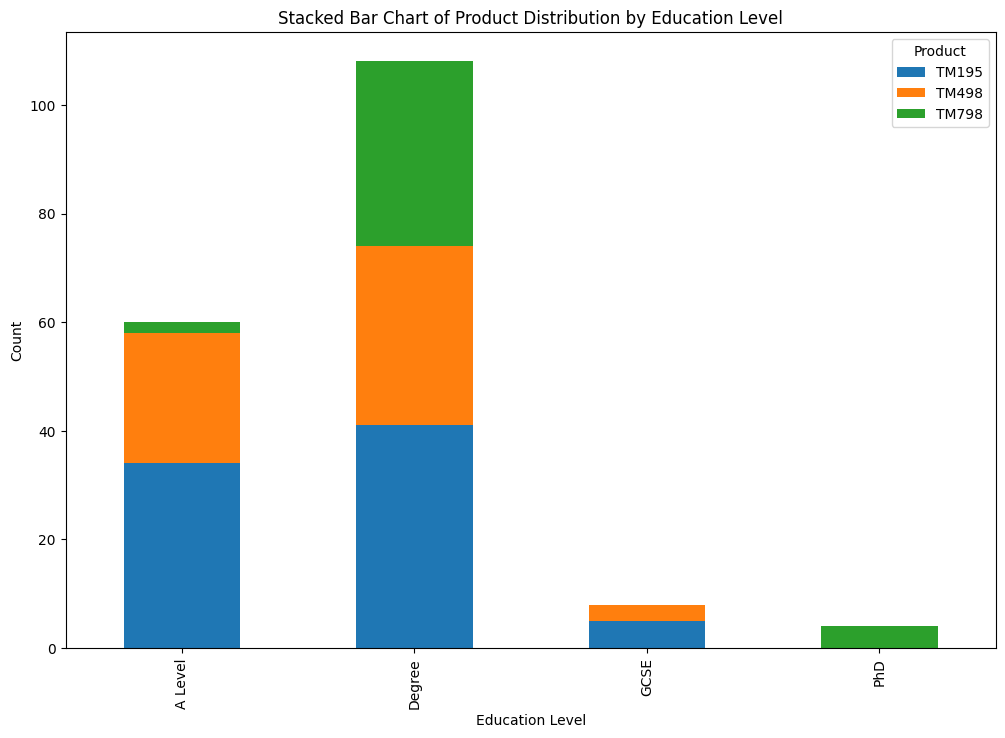

In [11]:
# Apply the mapping to the DataFrame
education_df = map_education_aliases(df)

# Function to plot a stacked bar chart of Product distribution for each EducationAlias
def stacked_bar_product_distribution_by_education(education_df):
    """
    This function plots a stacked bar chart of Product distribution for each EducationAlias.

    Parameters:
    df (pandas.DataFrame): The input DataFrame containing the data.
    """
    # Group the data by EducationAlias and Product, and count the occurrences
    grouped_data = df.groupby(['EducationAlias', 'Product']).size().unstack().fillna(0)

    # Plotting the stacked bar chart
    grouped_data.plot(kind='bar', stacked=True, figsize=(12, 8))

    # Add labels and title
    plt.xlabel('Education Level')
    plt.ylabel('Count')
    plt.title('Stacked Bar Chart of Product Distribution by Education Level')
    plt.legend(title='Product')
    plt.show()

# Plot the stacked bar chart
stacked_bar_product_distribution_by_education(df)

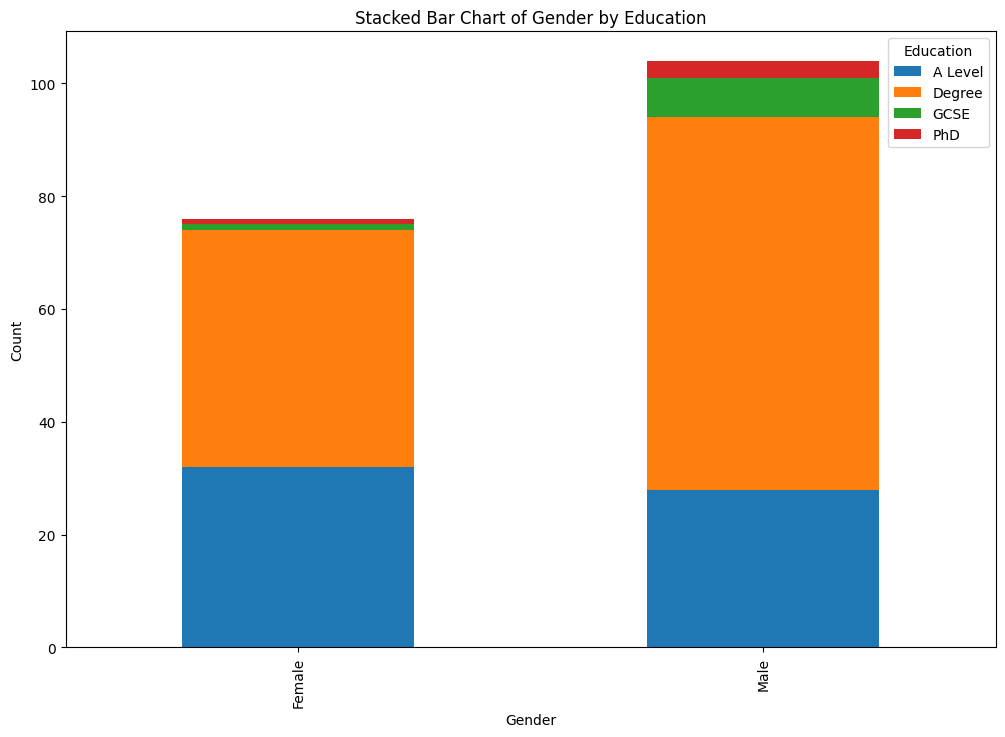

In [12]:

# Apply the mapping to the DataFrame
education_by_gender_df = map_education_aliases(df)

# Function to plot a stacked bar chart of Gender by EducationAlias, stacked by Education
def stacked_bar_gender_by_education_aliases(education_by_gender_df):
    """
    This function plots a stacked bar chart of Gender by EducationAlias, stacked by Education.

    Parameters:
    df (pandas.DataFrame): The input DataFrame containing the data.
    """
    # Group the data by Gender and EducationAlias, and count the occurrences
    grouped_data = df.groupby(['Gender', 'EducationAlias']).size().unstack().fillna(0)

    # Plot the stacked bar chart
    grouped_data.plot(kind='bar', stacked=True, figsize=(12, 8))

    # Add labels and title
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.title('Stacked Bar Chart of Gender by Education')
    plt.legend(title='Education')
    plt.show()

# Plot the stacked bar chart
stacked_bar_gender_by_education_aliases(df)



Total single males with education >= 16: 21
Total miles for single males with education >= 16: 2824
Total income of single males with education >= 16: £1,298,637.00
Total partnered females with education >= 16: 24
Total miles partnered females with education >= 16: 2554
Total income of partnered females with education >= 16: £1,381,381.00


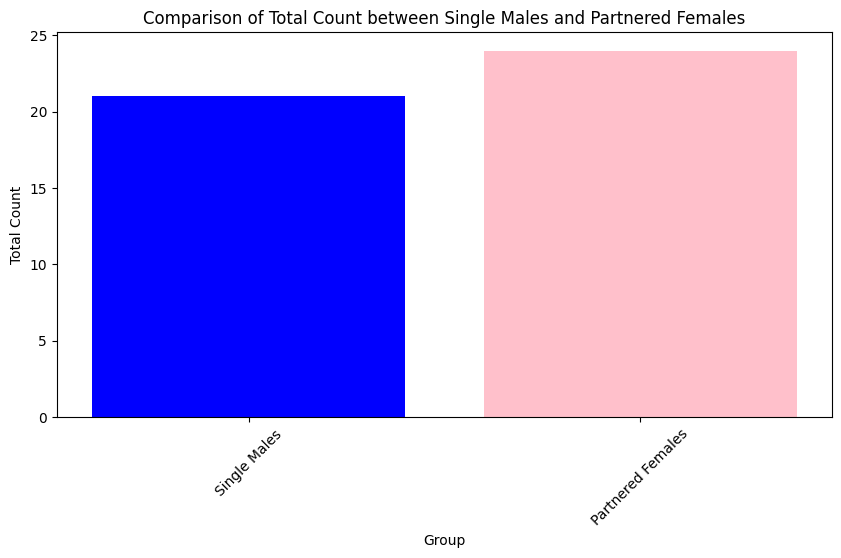

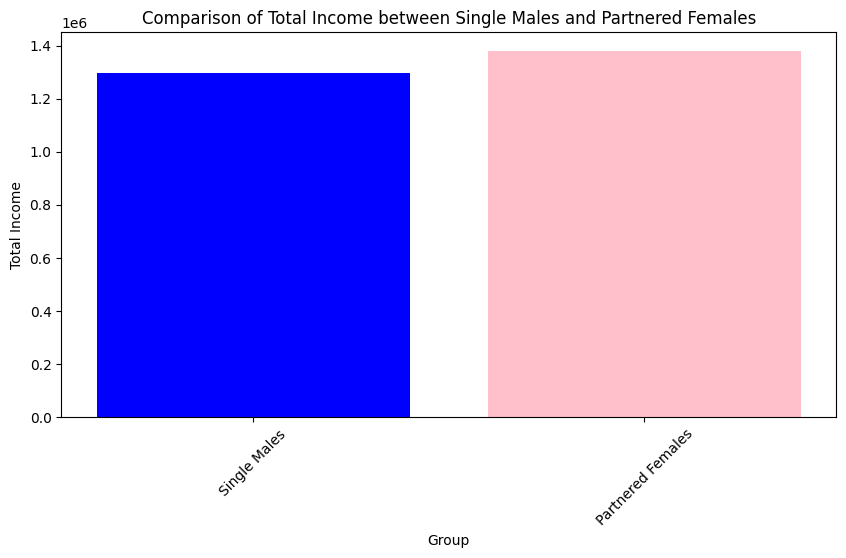

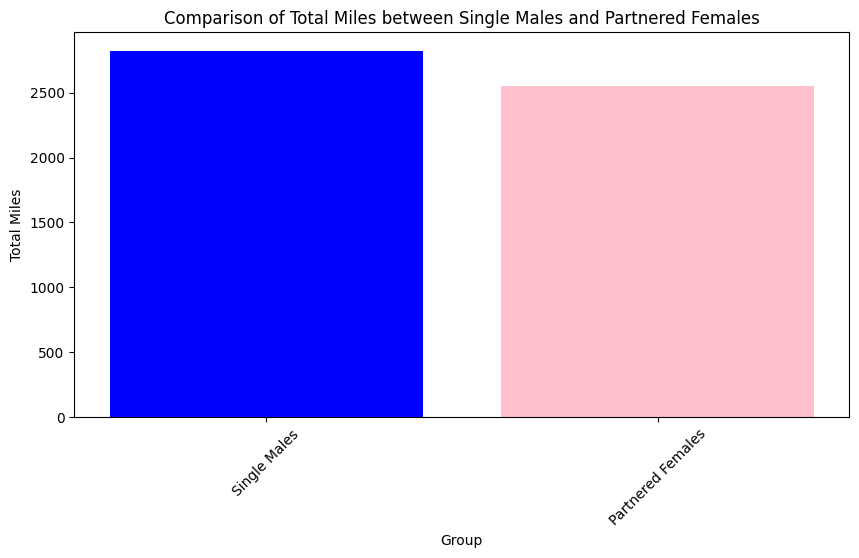

In [13]:
# Filter the dataset for single males with education greater or equal to 16
single_males_edu_16 = df[(df['Gender'] == 'Male') & (df['MaritalStatus'] == 'Single') & (df['Education'] >= 16)]

# Get the total count total income and total miles for single males with education >= 16
total_single_males_edu_16 = single_males_edu_16.shape[0]
total_income_single_males = single_males_edu_16['Income'].sum()
total_miles_single_males = single_males_edu_16['Miles'].sum()

# Filter the dataset for partnered females with education greater or equal to 16
partnered_females_edu_16 = df[(df['Gender'] == 'Female') & (df['MaritalStatus'] == 'Partnered') & (df['Education'] >= 16)]

# Get the total count total miles and total income for partnered females with education >= 16
total_partnered_females_edu_16 = partnered_females_edu_16.shape[0]
total_income_partnered_females = partnered_females_edu_16['Income'].sum()
total_miles_partnered_females = partnered_females_edu_16['Miles'].sum()

# Format the total income in UK pounds
total_income_single_males_pounds = f"£{total_income_single_males:,.2f}"
total_income_partnered_females_pounds = f"£{total_income_partnered_females:,.2f}"

print(f"Total single males with education >= 16: {total_single_males_edu_16}")
print(f"Total miles for single males with education >= 16: {total_miles_single_males}")
print(f"Total income of single males with education >= 16: {total_income_single_males_pounds}")
print(f"Total partnered females with education >= 16: {total_partnered_females_edu_16}")
print(f"Total miles partnered females with education >= 16: {total_miles_partnered_females}")
print(f"Total income of partnered females with education >= 16: {total_income_partnered_females_pounds}")

# Create a DataFrame for plotting
comparison_data = {
    'Group': ['Single Males', 'Partnered Females'],
    'Total Count': [total_single_males_edu_16, total_partnered_females_edu_16],
    'Total Miles': [total_miles_single_males, total_miles_partnered_females],
    'Total Income': [total_income_single_males, total_income_partnered_females]
}

comparison_df = pd.DataFrame(comparison_data)

# Bar chart for total count comparison
plt.figure(figsize=(10, 5))
plt.bar(comparison_df['Group'], comparison_df['Total Count'], color=['blue', 'pink'])
plt.title('Comparison of Total Count between Single Males and Partnered Females')
plt.xlabel('Group')
plt.ylabel('Total Count')
plt.xticks(rotation=45)
plt.show()

# Bar chart for total income comparison
plt.figure(figsize=(10, 5))
plt.bar(comparison_df['Group'], comparison_df['Total Income'], color=['blue', 'pink'])
plt.title('Comparison of Total Income between Single Males and Partnered Females')
plt.xlabel('Group')
plt.ylabel('Total Income')
plt.xticks(rotation=45)
plt.show()

# Bar chart for total miles comparison
plt.figure(figsize=(10, 5))
plt.bar(comparison_df['Group'], comparison_df['Total Miles'], color=['blue', 'pink'])
plt.title('Comparison of Total Miles between Single Males and Partnered Females')
plt.xlabel('Group')
plt.ylabel('Total Miles')
plt.xticks(rotation=45)
plt.show()

In [14]:
import pandas as pd

def average_age_per_product(df):
    """
    This function calculates the average age per product.

    Parameters:
    df (pandas.DataFrame): The input DataFrame containing the data.

    Returns:
    pandas.Series: A Series with the product names as the index and the average age as the values.
    """
    return df.groupby('Product')['Age'].mean()

# Calculate the average age per product
avg_age_per_product = average_age_per_product(df)

print(avg_age_per_product)





Product
TM195    28.55
TM498    28.90
TM798    29.10
Name: Age, dtype: float64


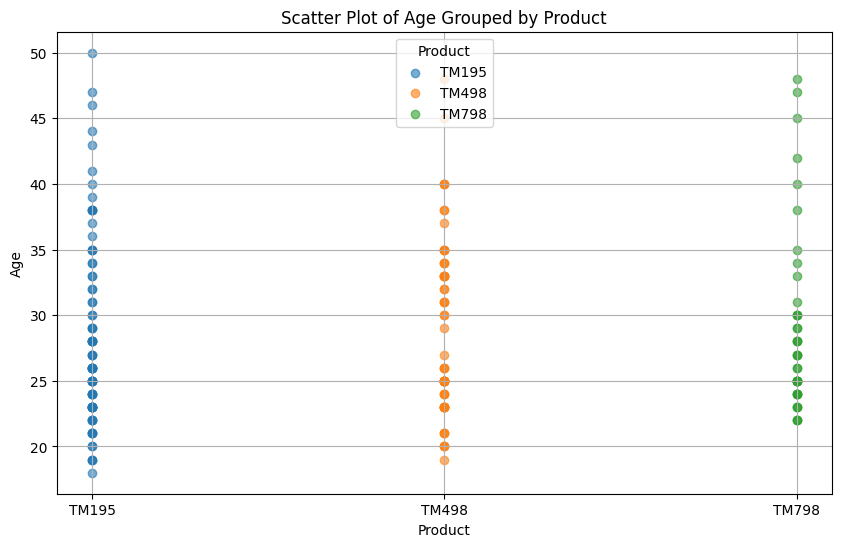

In [15]:
# Function to plot a scatter graph of age grouped by product
def scatter_age_by_product(df):
    """
    This function plots a scatter graph of age grouped by product.

    Parameters:
    df (pandas.DataFrame): The input DataFrame containing the data.
    """
    # Create a scatter plot
    plt.figure(figsize=(10, 6))

    # Iterate through each product and plot the age
    for product in df['Product'].unique():
        product_data = df[df['Product'] == product]
        plt.scatter(product_data['Product'], product_data['Age'], label=product, alpha=0.6)

    # Add labels and title
    plt.xlabel('Product')
    plt.ylabel('Age')
    plt.title('Scatter Plot of Age Grouped by Product')
    plt.legend(title='Product')
    plt.grid(True)
    plt.show()

# Plot the scatter graph
scatter_age_by_product(df)

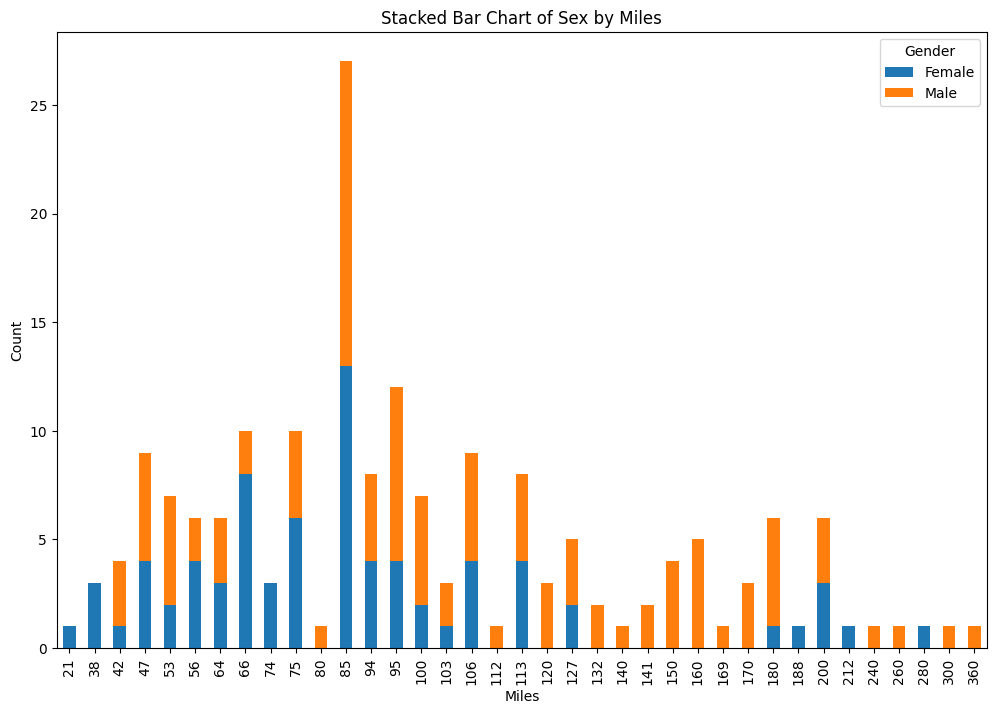

In [16]:
# Function to plot a stacked bar chart of sex by miles
def stacked_bar_sex_by_miles(df):
    """
    This function plots a stacked bar chart of sex by miles.

    Parameters:
    df (pandas.DataFrame): The input DataFrame containing the data.
    """
    # Group the data by Miles and Gender, then count the occurrences
    grouped_data = df.groupby(['Miles', 'Gender']).size().unstack().fillna(0)

    # Plot the stacked bar chart
    grouped_data.plot(kind='bar', stacked=True, figsize=(12, 8))

    # Add labels and title
    plt.xlabel('Miles')
    plt.ylabel('Count')
    plt.title('Stacked Bar Chart of Sex by Miles')
    plt.legend(title='Gender')
    plt.show()

# Plot the stacked bar chart
stacked_bar_sex_by_miles(df)


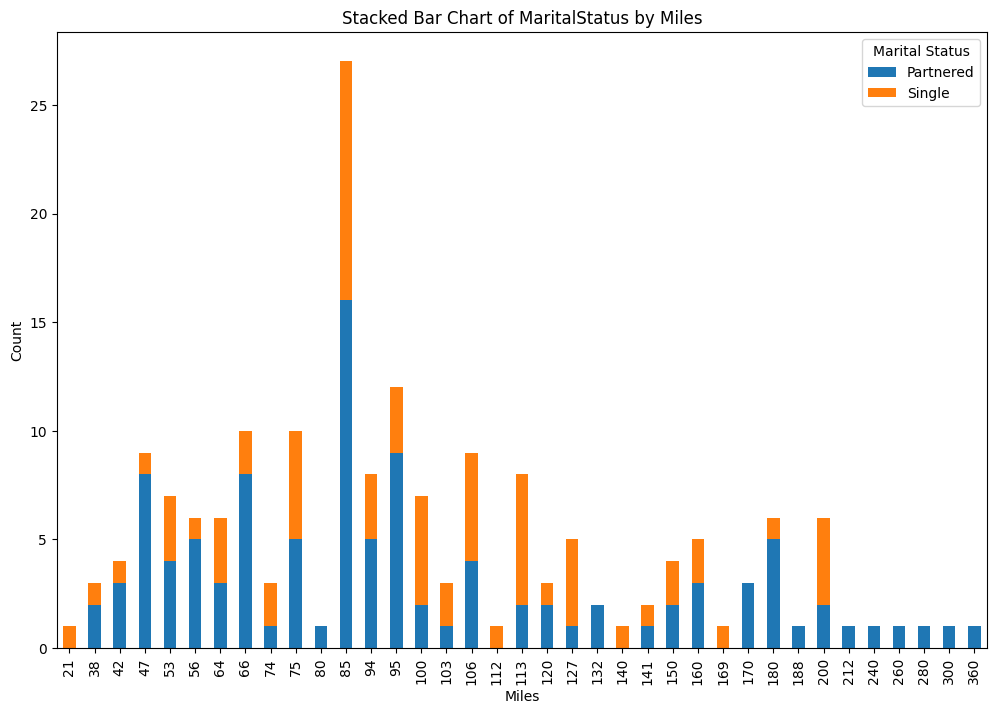

In [17]:
# Function to plot a stacked bar chart of MaritalStatus by miles
def stacked_bar_marital_status_by_miles(df):
    """
    This function plots a stacked bar chart of MaritalStatus by miles.

    Parameters:
    df (pandas.DataFrame): The input DataFrame containing the data.
    """
    # Group the data by Miles and MaritalStatus, then count the occurrences
    grouped_data = df.groupby(['Miles', 'MaritalStatus']).size().unstack().fillna(0)

    # Plot the stacked bar chart
    grouped_data.plot(kind='bar', stacked=True, figsize=(12, 8))

    # Add labels and title
    plt.xlabel('Miles')
    plt.ylabel('Count')
    plt.title('Stacked Bar Chart of MaritalStatus by Miles')
    plt.legend(title='Marital Status')
    plt.show()

# Plot the stacked bar chart
stacked_bar_marital_status_by_miles(df)


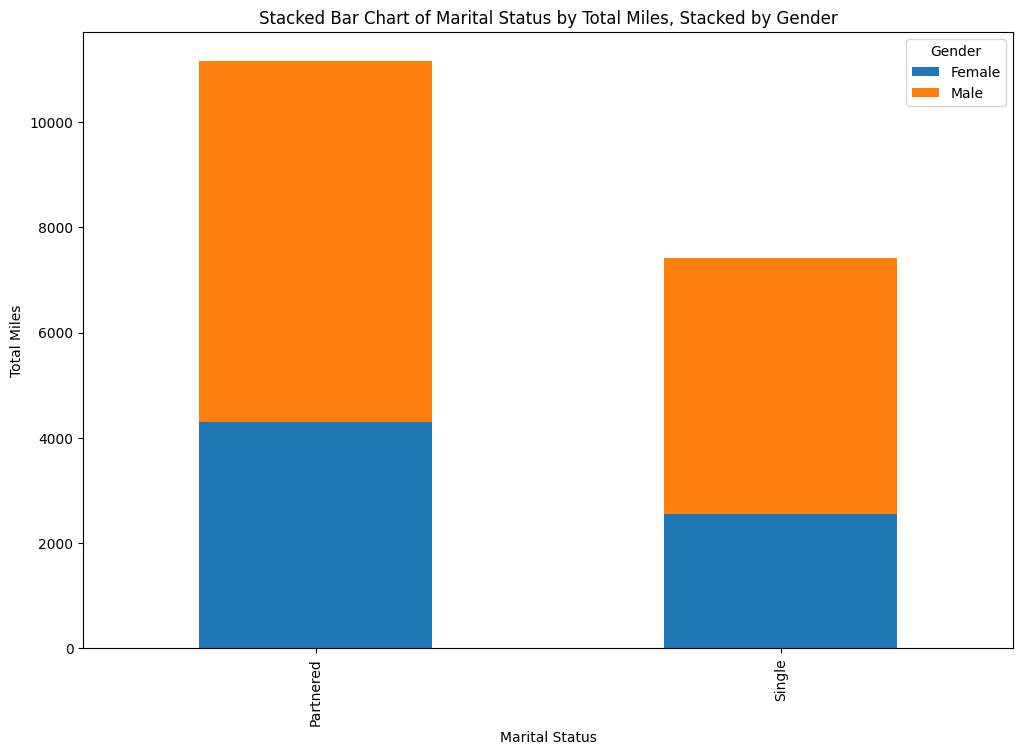

In [18]:
# Function to plot a stacked bar chart of MaritalStatus by total miles, stacked by gender
def stacked_bar_marital_status_by_total_miles_gender(df):
    """
    This function plots a stacked bar chart of MaritalStatus by total miles, stacked by gender.

    Parameters:
    df (pandas.DataFrame): The input DataFrame containing the data.
    """
    # Group the data by MaritalStatus and Gender, and calculate the total miles
    grouped_data = df.groupby(['MaritalStatus', 'Gender'])['Miles'].sum().unstack().fillna(0)

    # Plot the stacked bar chart
    grouped_data.plot(kind='bar', stacked=True, figsize=(12, 8))

    # Add labels and title
    plt.xlabel('Marital Status')
    plt.ylabel('Total Miles')
    plt.title('Stacked Bar Chart of Marital Status by Total Miles, Stacked by Gender')
    plt.legend(title='Gender')
    plt.show()

# Plot the stacked bar chart
stacked_bar_marital_status_by_total_miles_gender(df)
